In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv("Normalization_Standard (2).xls")

In [9]:
def categorize_delay(row):
    if row['WEATHER_DELAY'] > 0:
        return 'Weather Delay'
    elif row['CARRIER_DELAY'] > 0:
        return 'Carrier Delay'
    elif row['NAS_DELAY'] > 0:
        return 'NAS Delay'
    elif row['SECURITY_DELAY'] > 0:
        return 'Security Delay'
    elif row['LATE_AIRCRAFT_DELAY'] > 0:
        return 'Late Aircraft Delay'
    else:
        return 'No Delay'

In [10]:
df['Delay_Type'] = df.apply(categorize_delay, axis=1)

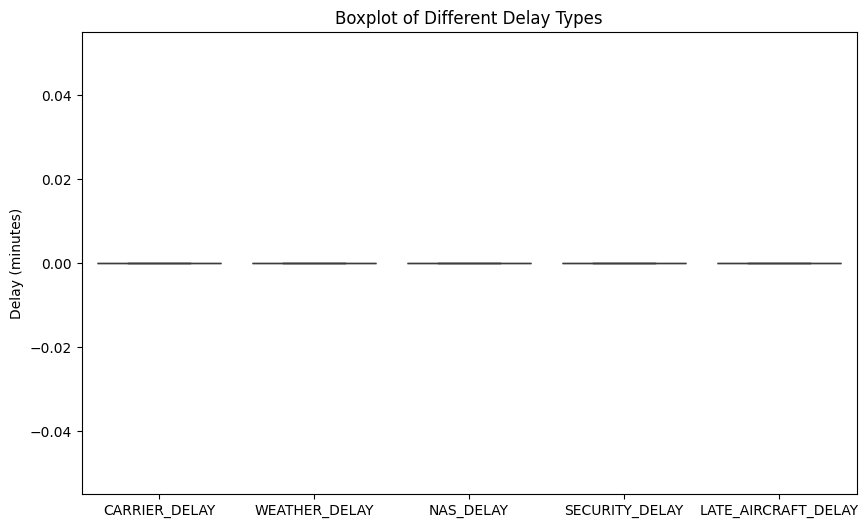

In [15]:
plt.figure(figsize=(10,6))
df_subset = df[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].dropna()
sns.boxplot(data=df_subset)
plt.title("Boxplot of Different Delay Types")
plt.ylabel("Delay (minutes)")
plt.show()

In [16]:
delay_counts = df['Delay_Type'].value_counts()
print("\nDelay Categories Distribution:")
print(delay_counts)


Delay Categories Distribution:
Delay_Type
No Delay    5033758
Name: count, dtype: int64


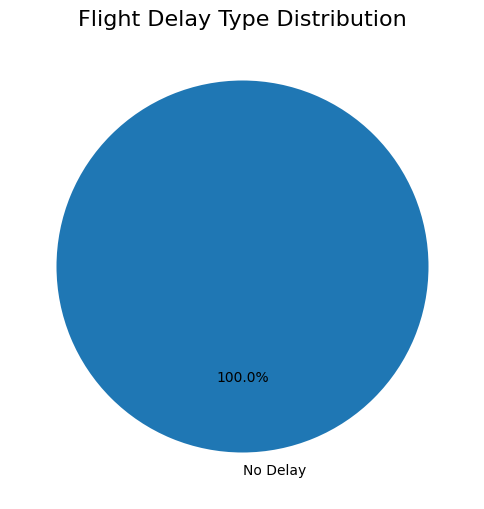

In [17]:
plt.figure(figsize=(6,8))
plt.pie(
    delay_counts, 
    labels=delay_counts.index, 
    autopct='%1.1f%%', 
    startangle=90
)
plt.title("Flight Delay Type Distribution", fontsize=16)
plt.show()

In [13]:
output_file = "updated_flight_delays.csv"
df.to_csv(output_file, index=False)

print(f"✅ File saved as {output_file}")


In [21]:
print(df.head())
print(df[delay_cols].describe())
print(df[delay_cols].isnull().sum())

   OP_CARRIER_FL_NUM  DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  WHEELS_ON  \
0               3280     601.0        1.0      22.0       623.0      714.0   
1               3281    1359.0       -5.0      15.0      1414.0     1629.0   
2               3282    1215.0       -5.0      18.0      1233.0     1323.0   
3               3283    1521.0       -6.0      14.0      1535.0     1618.0   
4               3284    1847.0      -15.0      18.0      1905.0     1935.0   

   TAXI_IN  ARR_TIME  ARR_DELAY  AIR_TIME  ...  DEST_ORD  DEST_OTHER  \
0      8.0     722.0       -1.0      51.0  ...     False       False   
1      4.0    1633.0      -36.0      75.0  ...     False        True   
2      6.0    1329.0      -16.0      50.0  ...     False        True   
3      7.0    1625.0      -14.0      43.0  ...     False       False   
4      5.0    1940.0      -25.0      90.0  ...     False        True   

   DEST_PHL  DEST_PHX  DEST_SAN  DEST_SEA  DEST_SFO  DEST_SLC  DEST_TPA  \
0     False     False  